In [1]:
#Bài tập 1
import pandas as pd

In [2]:
#a) đọc file csv vào DataFrame
df = pd.read_csv('Data.csv')

#b) Hiển thị lại dữ liệu đã đọc
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [3]:
#c) Hiển thị toàn bộ các loại dữ liệu cho cột Nationality (giá trị không trùng nhau)
df_nation = df['Nationality'].unique()
print(df_nation)

['UK' 'USA' 'N']


In [4]:
#d) Hiển thị toàn bộ các loại dữ liệu cho cột Go (giá trị không trùng nhau)
df_go = df['Go'].unique()
print(df_go)

['NO' 'YES']


In [5]:
#e) Thay đổi giá trị cho Nationality theo thứ tự: UK: 0, USA: 1, N: 2
map_value_nation={}
i = 0
for nation in df_nation:
    new_value = {nation:i}
    map_value_nation.update(new_value)
    i=i+1
print(map_value_nation)

{'UK': 0, 'USA': 1, 'N': 2}


In [6]:
df['Nationality'] = df['Nationality'].map(map_value_nation)
print(df)

    Age  Experience  Rank  Nationality   Go
0    36          10     9            0   NO
1    42          12     4            1   NO
2    23           4     6            2   NO
3    52           4     4            1   NO
4    43          21     8            1  YES
5    44          14     5            0   NO
6    66           3     7            2  YES
7    35          14     9            0  YES
8    52          13     7            2  YES
9    35           5     9            2  YES
10   24           3     5            1   NO
11   18           3     7            0  YES
12   45           9     9            0  YES


In [7]:
#f) Thay đổi giá trị cho Go theo thứ tự: Yes: 1, No: 0
map_value_go = {}
i = 0
for go in df_go:
    new_value = {go:i}
    map_value_go.update(new_value)
    i=i+1
print(map_value_go)

{'NO': 0, 'YES': 1}


In [8]:
df['Go'] = df['Go'].map(map_value_go)
print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [9]:
#g) Chia DataFrame X (feature columns) gồm các cột: Age, Experience, Rank,Nationality,
# DataFrame Y (target column) gồm cột Go.
features = df.drop(columns=['Go'])
print(features)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0


In [10]:
#h) Dùng DecisionTreeClassifier từ scikit-learn để huấn luyện.
yTrain = df['Go']
print(yTrain)

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [11]:
#i) Hiển thị cây dự đoán đã huấn luyện
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(features, yTrain)
y_pre = dtree.predict(features)
print(y_pre)

[0 0 0 0 1 0 1 1 1 1 0 1 1]


In [24]:
from sklearn import tree
text_pre = tree.export_text(dtree)
print(text_pre)

|--- feature_2 <= 6.50
|   |--- class: 0
|--- feature_2 >  6.50
|   |--- feature_0 <= 39.50
|   |   |--- feature_0 <= 35.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  35.50
|   |   |   |--- class: 0
|   |--- feature_0 >  39.50
|   |   |--- class: 1



[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

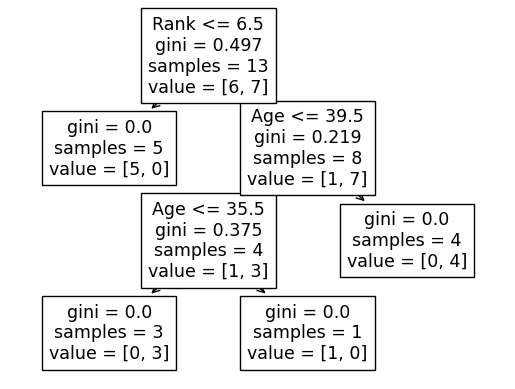

In [13]:
list_col = list(features.columns)
tree.plot_tree(dtree, feature_names = list_col)

In [14]:
import matplotlib.pyplot as plt

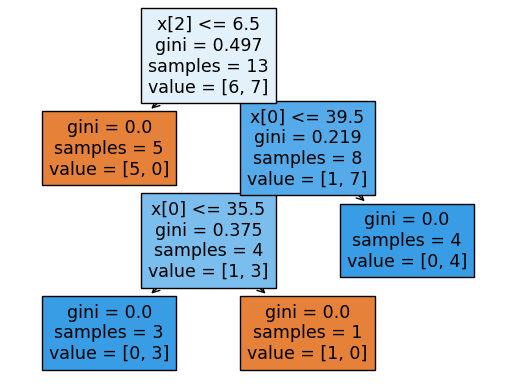

In [15]:
plt.figure()
tree.plot_tree(dtree, filled=True)
plt.savefig('tree.png',format='png',bbox_inches="tight")

In [16]:
#j) Tiến hành kiểm thử với case: [[40, 10, 7, 1]] và kiểm tra kết quả có phải thuộc class 1 (Yes) hay không?
from sklearn import metrics
print("Accucary:",metrics.accuracy_score(yTrain, y_pre))

Accucary: 1.0


In [20]:
xTest = [[40,10,7,1]]
yTest = dtree.predict(xTest)
print(yTest)

[1]


D:\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [21]:
#k Tiến hành chia dữ liệu phân lớp theo phương pháp Hold out (2/3 training và 1/3 testing).
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, df['Go'], test_size=0.3,random_state = 4)
print('x train 70%')
print(X_train)
print('y train 70%')
print(Y_train)

x train 70%
    Age  Experience  Rank  Nationality
9    35           5     9            2
2    23           4     6            2
0    36          10     9            0
11   18           3     7            0
8    52          13     7            2
1    42          12     4            1
5    44          14     5            0
7    35          14     9            0
10   24           3     5            1
y train 70%
9     1
2     0
0     0
11    1
8     1
1     0
5     0
7     1
10    0
Name: Go, dtype: int64


In [22]:
#Tiến hành xây dựng lại cây và kiểm thử kèm tính toán độ chính xác của mô hình. 
print(Y_test)
print(X_test)

3     0
4     1
6     1
12    1
Name: Go, dtype: int64
    Age  Experience  Rank  Nationality
3    52           4     4            1
4    43          21     8            1
6    66           3     7            2
12   45           9     9            0


In [23]:
#So sánh kết quả xây dựng cây từ scikit-learn với việc mô phỏng tự tính toán.
pt = DecisionTreeClassifier().fit(X_train, Y_train)
y_predic = pt.predict(X_test)
print(y_predic)

[0 0 1 0]


     Outlook Temperature Humidity    Wind Class
0      Sunny         Hot     High    Weak    NO
1      Sunny         Hot     High  Strong    NO
2   Overcast         Hot     High    Waek   YES
3       Rain        Mild     High    Weak   YES
4       Rain        Cool   Normal    Weak   YES
5       Rain        Cool   Normal  Strong    NO
6   Overcast        Cool   Normal  Strong   YES
7      Sunny        Mild     High    Weak    NO
8      Sunny        Cool   Normal    Weak   YES
9       Rain        Mild   Normal    Weak   YES
10     Sunny        Mild   Normal  Strong   YES
11  Overcast        Mild   Normal  Strong   YES
12  Overcast         Hot     High    Weak   YES
13      Rain        Mild   Normal  Strong    NO


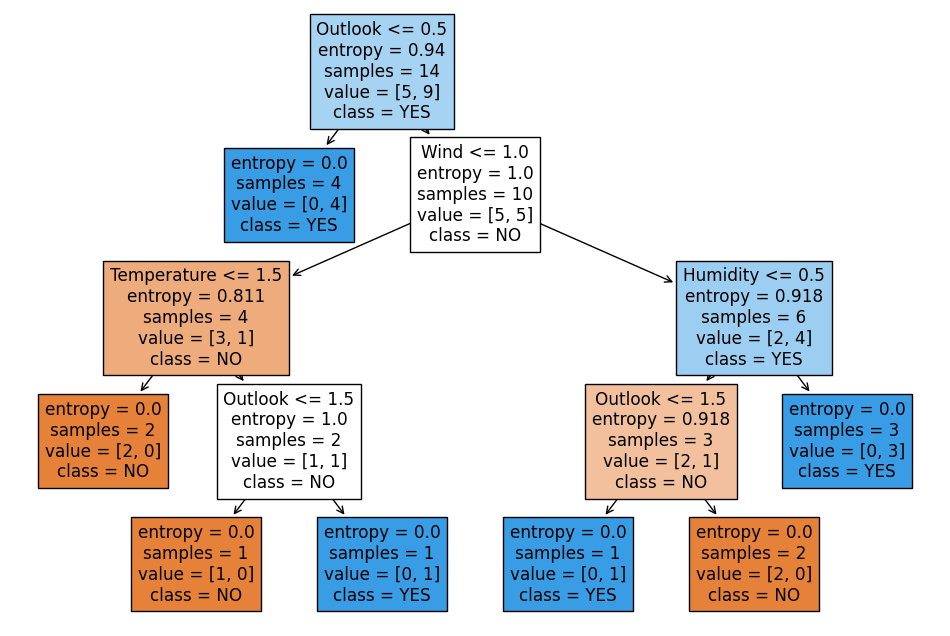

Prediction for <outlook=sunny, temperature=hot, humidity=high, wind=weak>:  NO


D:\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
#Bài tập 2
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Weather.csv')
print(df)
le = {}
for col in df.columns:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

# X và Y
X = df.drop(columns=['Class'])
Y = df['Class']

# Tạo mô hình cây quyết định
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)


plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=le['Class'].classes_)
plt.show()

test_case = [['Sunny', 'Hot', 'High', 'Weak']]
test_case_encoded = []
for i in range(len(test_case[0])):
    test_case_encoded.append(le[df.columns[i]].transform([test_case[0][i]])[0])

prediction = clf.predict([test_case_encoded])
predicted_class = le['Class'].inverse_transform(prediction)[0]

print("Prediction for <outlook=sunny, temperature=hot, humidity=high, wind=weak>: ", predicted_class)